Author: Lijing Wang, lijing52@stanford.edu; Jef Caers, jcaers@stanford.edu (2021)

In [1]:
## Clone data from our GitHub repository
! git clone https://github.com/lijingwang/GEOLSCI6_EARTHSYS100A.git

fatal: destination path 'GEOLSCI6_EARTHSYS100A' already exists and is not an empty directory.


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import warnings
import seaborn as sns
import statsmodels.formula.api as smf
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load the irregular elevation data




In [3]:
elevation = np.loadtxt('/content/GEOLSCI6_EARTHSYS100A/Geostatistics/elevation',skiprows = 6)

In [4]:
elevation = pd.DataFrame(elevation, columns = ['X','Y','Z', 'elevation'])
#elevation['X'] = elevation['X']/500
#elevation['Y'] = elevation['Y']/500

In [5]:
elevation.head()

,X,Y,Z,elevation
0,3500.0,0.0,0.0,-1512.3
1,20000.0,0.0,0.0,-1317.2
2,22000.0,0.0,0.0,-1365.5
3,22500.0,0.0,0.0,-1391.0
4,23000.0,0.0,0.0,-1390.2


([], <a list of 0 Text major ticklabel objects>)

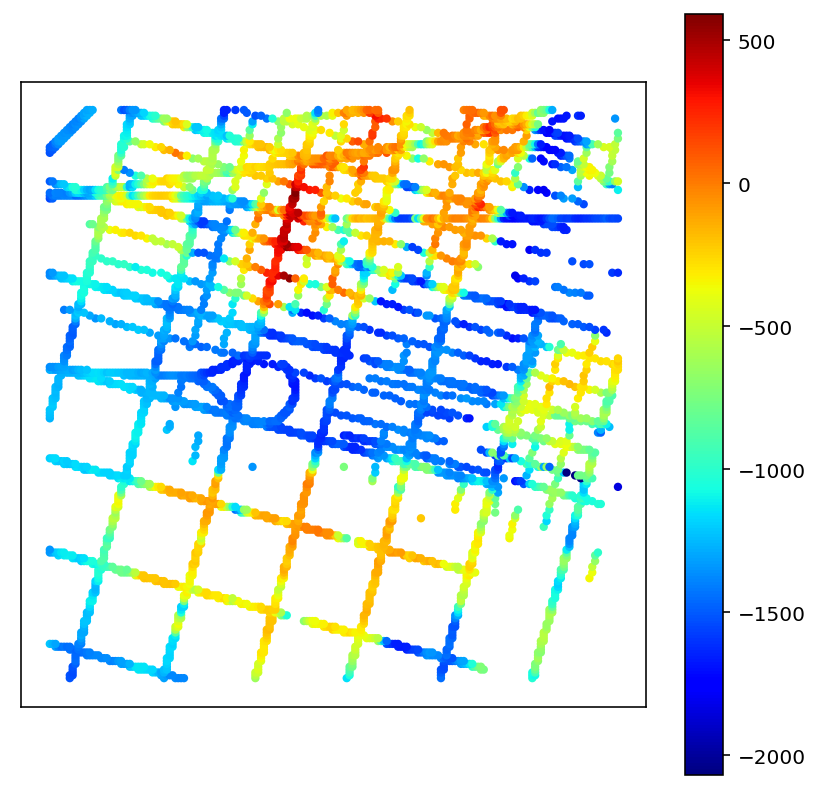

In [6]:
plt.figure(figsize=(7,7))
plt.scatter(elevation['X'],elevation['Y'], c = elevation['elevation'],s = 10, cmap = 'jet')
plt.gca().set(aspect='equal')
plt.colorbar()
plt.xticks([])
plt.yticks([])

# Load the image data/training image

In [7]:
TI = np.loadtxt('/content/GEOLSCI6_EARTHSYS100A/Geostatistics/TI_real108',skiprows = 3)

In [8]:
TI = TI.reshape(200,200)

([], <a list of 0 Text major ticklabel objects>)

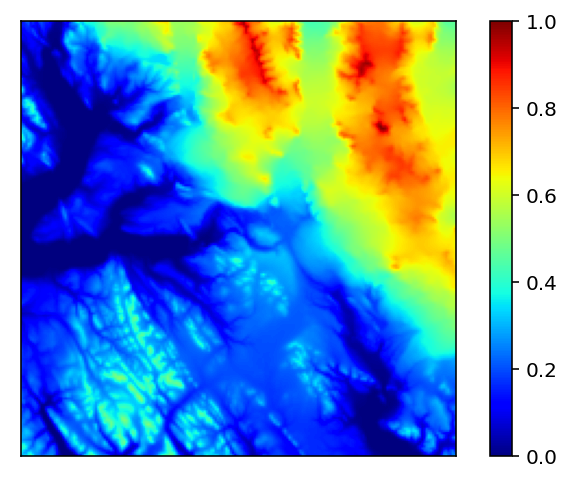

In [51]:
plt.imshow(TI,origin = 'lower', cmap = 'jet',vmin = 0, vmax = 1)
plt.colorbar()
plt.gca().set(aspect='equal')
plt.xticks([])
plt.yticks([])

In [10]:
X,Y = np.meshgrid(np.arange(200),np.arange(200))

In [11]:
TI_dataset = np.vstack([X.reshape(-1),Y.reshape(-1),TI.reshape(-1)])

In [12]:
TI_dataset = pd.DataFrame(TI_dataset.T,columns = ['X','Y','TI'])

In [13]:
import statsmodels.formula.api as smf
linear_reg = smf.ols(formula='TI ~ X+Y', data=TI_dataset)
linear_reg = linear_reg.fit()

In [14]:
print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     TI   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                 2.276e+04
Date:                Sun, 28 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:36:43   Log-Likelihood:                 15477.
No. Observations:               40000   AIC:                        -3.095e+04
Df Residuals:                   39997   BIC:                        -3.092e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0971      0.002    -44.859      0.0

([], <a list of 0 Text major ticklabel objects>)

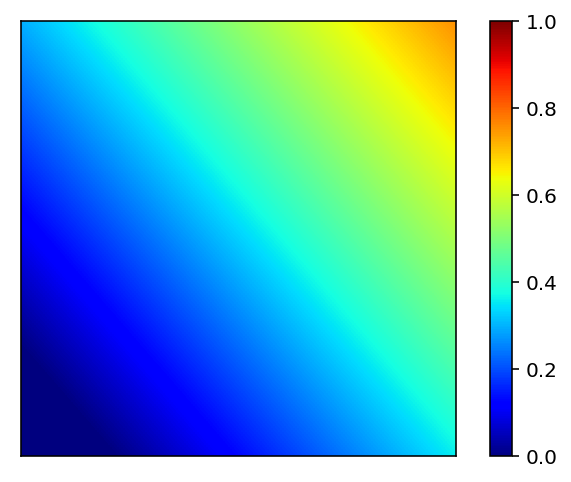

In [52]:
plt.imshow(linear_reg.predict().reshape(200,200),origin = 'lower', cmap = 'jet',vmin = 0, vmax = 1)
plt.colorbar()
plt.gca().set(aspect='equal')
plt.xticks([])
plt.yticks([])

In [55]:
np.savetxt('TI_real108_trend',trend_image.reshape(-1))

In [56]:
np.savetxt('TI_real108_residual',(TI-trend_image).reshape(-1))

In [16]:
trend_image = linear_reg.predict().reshape(200,200)

([], <a list of 0 Text major ticklabel objects>)

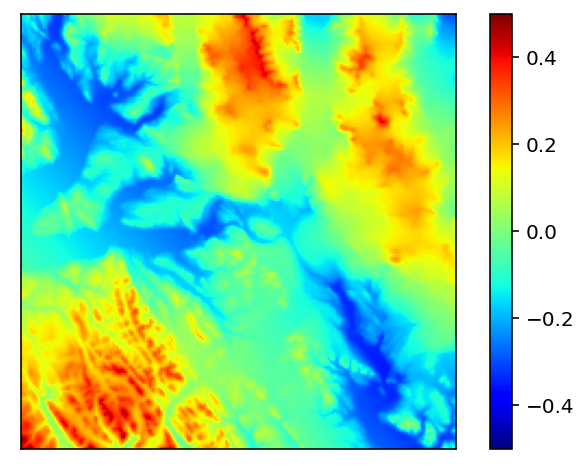

In [54]:

plt.imshow(TI-trend_image,origin = 'lower', cmap = 'jet',vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set(aspect='equal')
plt.xticks([])
plt.yticks([])